In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("~/Downloads/creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [9]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [10]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

np.int64(172)

In [11]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(max_iter=1000)
mod.fit(X, y).predict(X).sum()


np.int64(151)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range (1,4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [21]:
grid.cv_results_

{'mean_fit_time': array([0.39543408, 0.35955459, 0.36679453]),
 'std_fit_time': array([0.15426104, 0.06281001, 0.11799738]),
 'mean_score_time': array([0.01348758, 0.00367528, 0.00398749]),
 'std_score_time': array([0.01512529, 0.00097726, 0.00072305]),
 'param_class_weight': masked_array(data=[{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}],
              mask=[False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'class_weight': {0: 1, 1: 1}},
  {'class_weight': {0: 1, 1: 2}},
  {'class_weight': {0: 1, 1: 3}}],
 'split0_test_score': array([0.8431, 0.819 , 0.7089]),
 'split1_test_score': array([0.99835, 0.9984 , 0.99845]),
 'split2_test_score': array([0.9995 , 0.99965, 0.9996 ]),
 'split3_test_score': array([0.99785, 0.99805, 0.99815]),
 'mean_test_score': array([0.9597  , 0.953775, 0.926275]),
 'std_test_score': array([0.0673217 , 0.07781466, 0.12550268]),
 'rank_test_score': array([1, 2, 3], dtype=int32)}

In [25]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.395434,0.154261,0.013488,0.015125,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.8431,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,0.359555,0.062810,0.003675,0.000977,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.8190,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.366795,0.117997,0.003987,0.000723,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.7089,0.99845,0.99960,0.99815,0.926275,0.125503,3


In [15]:
from sklearn.metrics import precision_score, recall_score, make_scorer

**recall_score** = Did I get all the fraud cases?

**precision_score** = Given that I predict fraud, how accurate is it actually?

In [16]:
recall_score(y, grid.predict(X))

0.6020408163265306

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,4)]},
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, ...]}"
,scoring,"{'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict')}"
,n_jobs,-1
,refit,'precision'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,penalty,'l2'


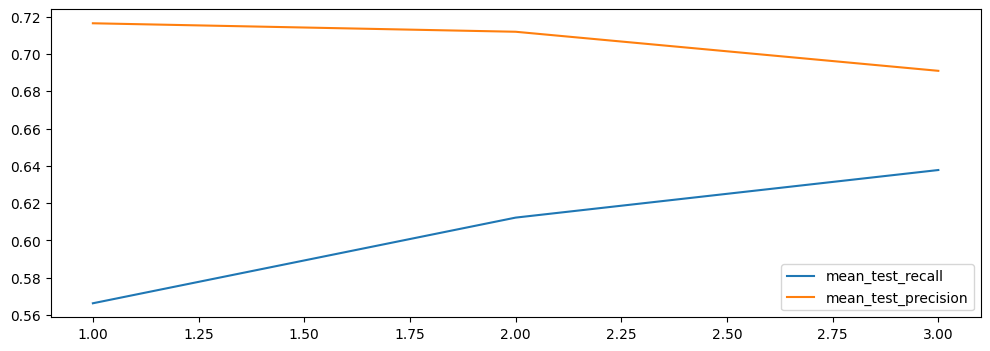

In [18]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend();

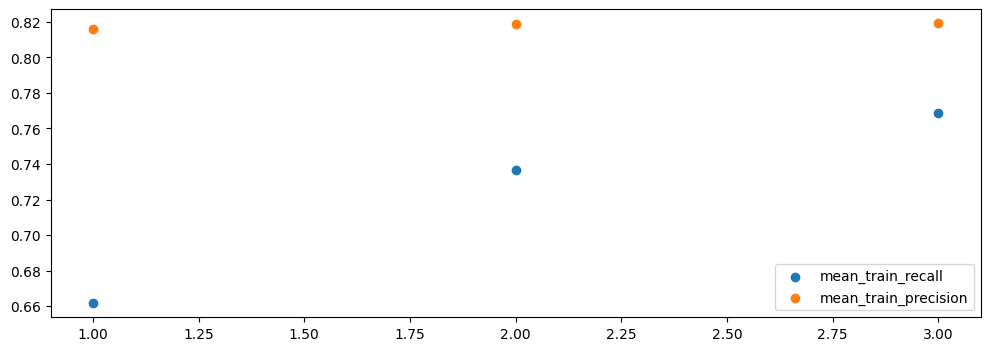

In [60]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend();

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

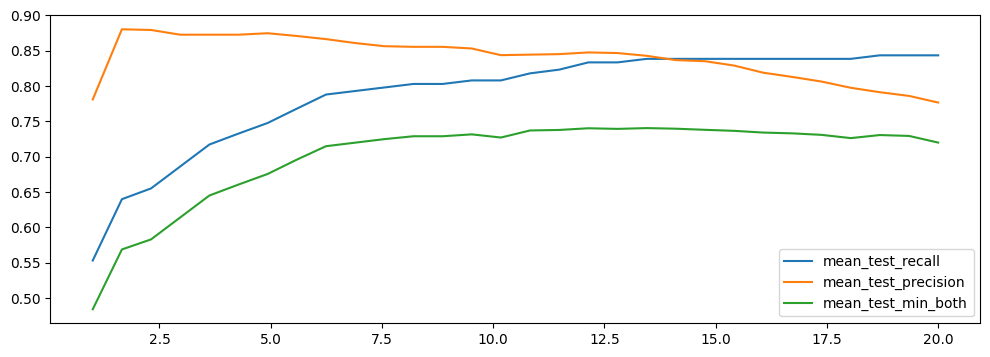

In [62]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
             df_results[score],
             label=score)
plt.legend();

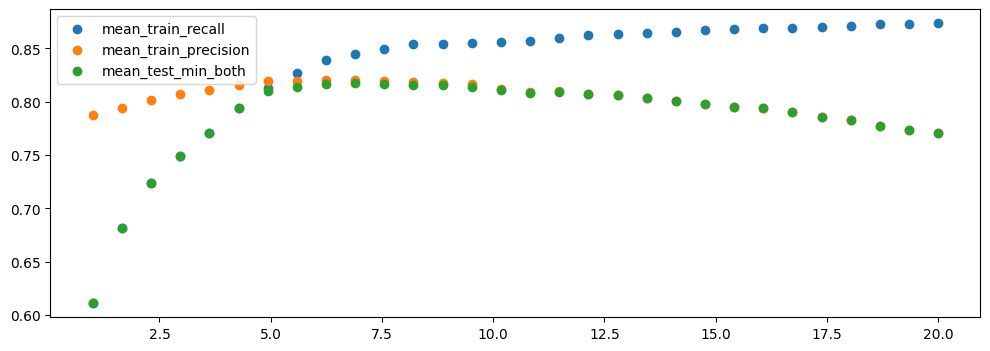

In [63]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend();

In [65]:
print(grid.best_params_)
print(grid.best_score_)

{'class_weight': {0: 1, 1: np.float64(13.448275862068964)}}
0.740387149244932


In [80]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0], shape=(80000,))